# GROUP 2 FINAL MACHINE LEARNING PROJECT

## PROGRESS MADE SO FAR:

 - Preprocessing steps include:
    - Reducing Problem to Binary Classification Problem
    - Feature Normalization
    - Missing values Imputation
    - Oversampling using SMOTE to Balance Classes
    - Dimensionality Reduction
    - Data Visualization with T-SNE
 - Data Resulting from Preprocessing:
    - Original Unbalanced Dataset
    - Balanced Dataset
    - PCA Reduced Dataset
    - LDA Reduced Dataset
    - UMAP Reduced Dataset
 - Training Steps Include:
    - Fitting 27 machine learning models to each of the dataset above and comparing performance
    - Optimizing the best performing model in each case
    - Choosing the best performing model applied to the best performing data version (ExtratreesClassifers on Balanced Original Dataset)
    - Choosing the best 10 performing model on the balanced dataset, optimizing them and fusing their result
 - Findings:
    - After fitting several models to the different versions of the dataset, the best performing model was ExtrtreesClassifier
    - The best version of the dataset was the balanced original dataset without dimensionality reduction
    - ExtratreesClassifier optimized on the original balanced dataset was the optimal option, achieving:
       - Accuracy: 0.9790
       - Precision: 0.9790
       - Recall (sensitivity): 0.9790
       - Specificity: 0.9790
       - F1_score: 0.9790
       - AUC-ROC: 0.998
    - There was not case of overfitting using the full features because the model peroformed very well on test data just like it does on training data
 - Conclusion:
    - Our best model (ExtratreesClassifiers) outperformed the model in the SOTA paper (XGBoost) which has accuracy of 0.9147, sensitivity of 0.6923, F1-Score of 0.9514 and AUC-ROC of 0.7865
    - The fused models did not perform significantly better than the ExtratreesClassifier
    - Hence, we choose and deploy the ExtratreesClassifier.Auc: 0.996

## LIBRARY IMPORTATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from umap import UMAP
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.manifold import TSNE
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Suppress all warnings
warnings.filterwarnings("ignore")

## LOADING AND DISPLAYING DATASET

In [2]:
#FUNCTION FOR DISPLAYING FALL DATASET (COLUMNS)
def display_(output, max, transpose=None, heading=None):
    pd.set_option("display.max_"+max, None)
    if heading:
        display(heading)
    if transpose:
        display(output.transpose())
    else:
        display(output)
    print("\n")
    pd.reset_option("display.max_"+max)

In [3]:
data = pd.read_csv('data-2.csv')

display_(data.head(), "columns")
data.info()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,77.00,1,2.00,1.00,1.00,2.00,NaN,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.70,0.00,138.00,NaN,NaN,NaN,8.00,16.00,4.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0
1,55.00,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,120.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.38,0.18,NaN,7.80,3.00,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0
2,52.00,1,0.00,0.00,0.00,2.00,NaN,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,100.00,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,132.00,0.30,0.11,NaN,10.80,NaN,3.00,3.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0
3,68.00,0,0.00,0.00,0.00,2.00,NaN,2.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,NaN,NaN,120.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.90,0.00,146.00,0.75,0.37,NaN,NaN,NaN,2.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0
4,60.00,1,0.00,0.00,0.00,2.00,NaN,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,190.00,100.00,160.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.45,0.22,NaN,8.30,NaN,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 112 entries, AGE to output
dtypes: float64(110), int64(2)
memory usage: 1.5 MB


In [4]:
data["output"].nunique()

8

## REDUCING PROBLEM TO BINARY CLASSIFICATION PROBLEM AND HANDLING MISSING VALUES

In [5]:
# REDUCING PROBLEM TO BINARY CLASSIFICATION PROBLEM
data["output"] = data["output"].apply(lambda x: 1 if x > 1 else x)
#display_(data_orig_binary, max="columns")
display_(data.head(), "columns")
data.info()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,77.00,1,2.00,1.00,1.00,2.00,NaN,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.70,0.00,138.00,NaN,NaN,NaN,8.00,16.00,4.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0
1,55.00,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,120.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.38,0.18,NaN,7.80,3.00,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0
2,52.00,1,0.00,0.00,0.00,2.00,NaN,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,100.00,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,132.00,0.30,0.11,NaN,10.80,NaN,3.00,3.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0
3,68.00,0,0.00,0.00,0.00,2.00,NaN,2.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,NaN,NaN,120.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.90,0.00,146.00,0.75,0.37,NaN,NaN,NaN,2.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0
4,60.00,1,0.00,0.00,0.00,2.00,NaN,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,190.00,100.00,160.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.45,0.22,NaN,8.30,NaN,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 112 entries, AGE to output
dtypes: float64(110), int64(2)
memory usage: 1.5 MB


In [6]:
data["output"].nunique()

2

In [7]:
# MISSING VALUE HANDLING

In [8]:
# Missing values
display_(data.isnull().sum().to_frame(), "columns", transpose=True, heading="Missing values:")

'Missing values:'

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,8,0,4,106,73,51,1628,9,8,248,54,21,21,21,21,21,21,21,18,18,18,18,18,18,18,11,10,10,7,7,7,7,7,1076,1076,267,267,12,15,14,12,12,12,83,80,80,72,1,152,152,152,152,152,152,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,10,10,10,10,10,10,10,369,371,375,375,284,285,1696,125,203,126,16,108,128,657,686,677,9,5,108,131,10,110,131,10,11,13,17,17,16,16,0


In [9]:
# function for dropping columns with high missing values
def drop_columns_with_high_missing_values(df, threshold=50):
    """
    Drops columns from a Pandas DataFrame that have a percentage of missing values
    above a specified threshold.

    Args:
        df: The input Pandas DataFrame.
        threshold: The percentage threshold for missing values (default is 70).

    Returns:
        A new DataFrame with columns exceeding the missing value threshold removed.
    """

    # Calculate the percentage of missing values in each column
    missing_percentage = df.isnull().sum() / len(df) * 100

    # Identify columns with more than the threshold percentage of missing values
    columns_to_drop = missing_percentage[missing_percentage > threshold].index

    # Drop the identified columns
    df_slim = df.drop(columns=columns_to_drop)

    return df_slim

In [10]:
data = drop_columns_with_high_missing_values(data, threshold=50)

# Display the updated DataFrame
display_(data.head(), "columns", heading="After removing columns with more than 50% missing values:")

display_(data.isnull().sum().to_frame(), "columns", transpose=True, heading="Missing values in remaining columns:")

'After removing columns with more than 50% missing values:'

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,77.00,1,2.00,1.00,1.00,2.00,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.70,0.00,138.00,NaN,NaN,8.00,16.00,4.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0
1,55.00,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,120.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.38,0.18,7.80,3.00,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0
2,52.00,1,0.00,0.00,0.00,2.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,132.00,0.30,0.11,10.80,NaN,3.00,3.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0
3,68.00,0,0.00,0.00,0.00,2.00,2.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,120.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.90,0.00,146.00,0.75,0.37,NaN,NaN,2.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0
4,60.00,1,0.00,0.00,0.00,2.00,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,160.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.45,0.22,8.30,NaN,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0


'Missing values in remaining columns:'

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,8,0,4,106,73,51,9,8,248,54,21,21,21,21,21,21,21,18,18,18,18,18,18,18,11,10,10,7,7,7,7,7,267,267,12,15,14,12,12,12,83,80,80,72,1,152,152,152,152,152,152,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,10,10,10,10,10,10,10,369,371,375,375,284,285,125,203,126,16,108,128,657,686,677,9,5,108,131,10,110,131,10,11,13,17,17,16,16,0


In [11]:
# view column names according to data type
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fib

In [12]:
display_(data.head(), "columns")
data.info()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,77.00,1,2.00,1.00,1.00,2.00,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.70,0.00,138.00,NaN,NaN,8.00,16.00,4.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0
1,55.00,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,120.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.38,0.18,7.80,3.00,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0
2,52.00,1,0.00,0.00,0.00,2.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,132.00,0.30,0.11,10.80,NaN,3.00,3.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0
3,68.00,0,0.00,0.00,0.00,2.00,2.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,120.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.90,0.00,146.00,0.75,0.37,NaN,NaN,2.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0
4,60.00,1,0.00,0.00,0.00,2.00,3.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,160.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.50,0.00,132.00,0.45,0.22,8.30,NaN,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 108 entries, AGE to output
dtypes: float64(106), int64(2)
memory usage: 1.4 MB


## FUNCTION TO NORMALIZE DATA

In [13]:
def normalize_dataset(df, method='min_max'):
    """Normalizes the numerical features of a Pandas DataFrame using scikit-learn.

    Args:
        df: The input DataFrame.
        method: The normalization method to use ('min_max' or 'z_score').
               Defaults to 'min_max'.

    Returns:
        A new DataFrame with normalized numerical features, or None if an invalid
        method is specified. The original DataFrame is not modified.
    """

    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    # Create a copy to avoid modifying the original DataFrame
    normalized_df = df.copy()

    # Apply the chosen normalization method
    if method == 'min_max':
        scaler = MinMaxScaler()
    elif method == 'z_score':
        scaler = StandardScaler()
    else:
        raise ValueError("Unsupported normalization method. Use 'min_max' or 'z_score'.")

    # Fit and transform the scaler on the numerical columns
    normalized_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return normalized_df

## FUNCTION FOR MISSING VALUE IMPUTATION

In [14]:
def impute_missing_values(df, method='mean', normalize_for_knn=True):
    """
    Imputes missing values in a Pandas DataFrame using various strategies.

    Args:
        df: The input DataFrame with missing values.
        method: The imputation method to use ('mean', 'median', 'mode', 'knn').
                Defaults to 'mean'.
        normalize_for_knn: Whether to normalize data before KNN imputation
                           (default is True).

    Returns:
        A new DataFrame with imputed values.
    """

    imputed_df = df.copy()  # Create a copy to avoid modifying the original

    # Impute based on the selected method
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
    elif method == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        if normalize_for_knn:
            imputed_df = normalize_dataset(imputed_df, method='min_max')
    else:
        print("Invalid imputation method. Choose 'mean', 'median', 'mode', or 'knn'.")
        return df  # Return original DataFrame if method is invalid

    # Apply imputation
    imputed_array = imputer.fit_transform(imputed_df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)  # Assign original column names

    return imputed_df

In [15]:
# Impute using knn
data = impute_missing_values(data, method='mean')

In [16]:
# No more missing values
display_(data.isnull().sum().to_frame(), "columns", transpose=True, heading="Missing values in remaining columns:")

'Missing values in remaining columns:'

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,output
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## HANDLE CLASS IMBALANCE

Class Distribution
output
0.00    1429
1.00     271
Name: count, dtype: int64


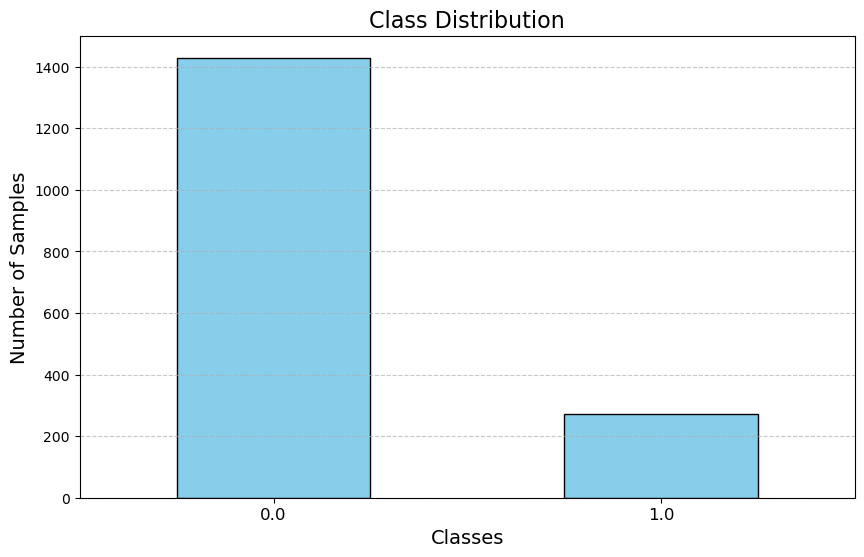

In [17]:
def visualize_class_distribution(data, target_column, title='Class Distribution'):
    """
    Visualizes the class distribution of a target column in a Pandas DataFrame.

    Args:
        data: The input Pandas DataFrame.
        target_column: The name of the target column (string).
        title: The title of the plot (string).
    """

    # Get class distribution
    class_counts = data[target_column].value_counts()

    # Print the class distribution
    print(title)
    print(class_counts)

    # Visualize the class distribution
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Number of Samples', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

visualize_class_distribution(data, 'output')

In [18]:
def handle_class_imbalance(data, target_column, method='smote', visualize=True):
    """
    Handles class imbalance in a Pandas DataFrame using SMOTE or ADASYN.

    Args:
        data: The input Pandas DataFrame.
        target_column: The name of the target column (string).
        method: The oversampling method to use ('smote' or 'adasyn'). Defaults to 'smote'.
        visualize: Whether to visualize the class distributions (default is True).

    Returns:
        A Pandas DataFrame with the oversampled data.
    """

    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Oversampling
    if method == 'smote':
        oversampler = SMOTE(random_state=42)
    elif method == 'adasyn':
        oversampler = ADASYN(random_state=42)
    else:
        raise ValueError("Invalid oversampling method. Choose 'smote' or 'adasyn'.")

    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

    # Visualize class distributions (optional)
    if visualize:
        visualize_class_distribution(data_resampled, target_column,
                                      title=f'Class Distribution After {method.upper()}')

    return data_resampled

Class Distribution After SMOTE
output
0.00    1429
1.00    1429
Name: count, dtype: int64


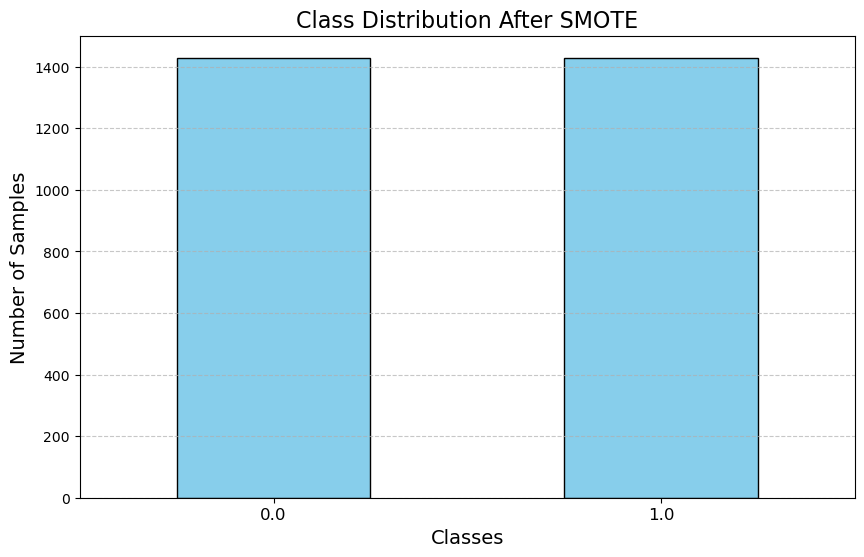

In [19]:
# For SMOTE oversampling:
data_balanced = handle_class_imbalance(data, 'output', method='smote')

## DIMENSIONALITY REDUCTION

In [20]:
# PCA (Visualization is onlu possible for 2 or 3 principal components)

def perform_pca(data, target_column="output", variance_threshold=0.90, visualize=True):
    """
    Performs dimensionality reduction using Principal Component Analysis (PCA).

    Args:
        data: The input Pandas DataFrame with imputed data.
        target_column: The name of the target column (string). Defaults to 'output'.
        variance_threshold: The desired explained variance ratio (float). Defaults to 0.90 (90%).
        visualize: Whether to visualize the PCA results (for 1D, 2D, or 3D).

    Returns:
        A Pandas DataFrame with reduced dimensions using PCA.
    """
    # Separate features (X) and target variable (y)
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Scale the numerical features
    data_scaled = normalize_dataset(X, method="z_score")

    # Apply PCA with the specified variance threshold
    pca = PCA(n_components=variance_threshold)
    data_pca = pca.fit_transform(data_scaled)

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Number of components
    n_components = pca.n_components_

    print(f"Number of components: {n_components}")
    print(f"Explained variance ratio: {explained_variance_ratio.sum()}")

    # Create a DataFrame for the PCA results
    df_pca = pd.DataFrame(
        data=data_pca, columns=[f"PC{i}" for i in range(1, n_components + 1)]
    )

    df_pca[target_column] = y  # Add the target column back

    # Visualization
    if visualize:
        fig = plt.figure(figsize=(10, 8))
        if n_components == 1:
            # 1D Visualization: Strip plot along PC1
            plt.scatter(data_pca[:, 0], [0] * len(data_pca), c=y, cmap="Spectral", s=20)
            plt.colorbar(label=target_column)
            plt.title("PCA Dimensionality Reduction (1D)")
            plt.xlabel("PC1")
            plt.yticks([])  # Hide y-axis ticks
        elif n_components == 2:
            # 2D Visualization: Scatter plot for PC1 and PC2
            plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y, cmap="Spectral", s=10)
            plt.colorbar(label=target_column)
            plt.title("PCA Dimensionality Reduction (2D)")
            plt.xlabel("PC1")
            plt.ylabel("PC2")
        elif n_components == 3:
            # 3D Visualization: Scatter plot for PC1, PC2, and PC3
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(
                data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=y, cmap="Spectral", s=10
            )
            fig.colorbar(scatter, label=target_column)
            ax.set_title("PCA Dimensionality Reduction (3D)")
            ax.set_xlabel("PC1")
            ax.set_ylabel("PC2")
            ax.set_zlabel("PC3")
        plt.show()

    return df_pca

In [21]:
# Perform PCA and visualize (Visualization possible for only 2 or 3 principal components)
data_pca = perform_pca(data=data_balanced, target_column="output", variance_threshold=0.90, visualize=True)
    

# Display the transformed DataFrame
display_(data_pca.head(), "columns")

Number of components: 77
Explained variance ratio: 0.9009008712724433


<Figure size 1000x800 with 0 Axes>

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,output
0,0.79,2.26,-1.16,-0.91,-0.45,1.45,-0.92,0.36,2.32,0.71,-0.92,-0.82,1.49,0.28,-0.27,-3.91,-0.53,1.24,1.79,2.07,-0.03,1.19,-3.13,-0.69,1.45,-1.47,1.35,1.38,-0.66,-0.63,0.81,0.80,-0.45,-1.43,-0.96,-3.26,0.75,-0.55,0.44,0.42,1.38,-1.64,-3.14,0.67,0.14,-0.88,0.92,2.18,-0.10,2.32,1.45,-0.07,1.63,-2.50,4.49,0.57,0.69,-2.22,-0.63,-0.74,0.43,0.50,1.60,-1.36,0.46,1.61,1.02,-0.47,-2.76,0.03,0.76,-0.26,-2.31,-2.33,-0.89,0.14,0.91,0.00
1,-2.81,-1.13,0.91,3.40,0.10,-1.48,-0.25,-0.51,0.63,-0.89,0.24,-1.12,0.49,-1.30,-0.88,1.06,-0.07,-1.25,-0.25,0.05,-0.54,-0.19,-1.24,-0.27,1.23,0.75,0.57,-0.06,-0.70,-0.60,-0.79,-0.88,0.35,-0.48,-0.17,-0.50,-0.04,-0.04,-0.97,0.27,0.38,0.97,-0.36,-0.02,-0.08,-0.38,0.48,-0.40,0.33,0.00,0.29,-0.76,0.41,1.36,0.21,-0.15,-0.41,0.26,0.34,-1.00,-0.53,1.24,-1.68,-0.53,1.75,1.62,0.16,0.59,-0.53,0.44,0.18,-0.28,0.84,0.27,-0.30,-0.43,-0.26,0.00
2,-2.35,3.22,3.33,4.16,2.13,-0.32,-0.73,3.75,-1.34,-0.03,0.85,1.80,0.83,1.46,-2.65,-0.56,1.14,-0.19,2.56,2.62,-0.37,0.09,-0.63,-0.57,-2.46,0.37,1.15,-1.97,1.59,-0.66,-0.03,0.52,-1.00,0.71,0.37,1.03,0.71,0.83,0.61,0.07,-0.74,-0.21,-0.05,-0.39,-0.52,-0.49,0.22,0.05,0.22,1.12,1.30,0.59,-0.10,0.05,-0.25,-1.11,-1.10,-1.10,0.40,0.13,-0.16,-0.03,-0.15,0.77,-0.45,-0.96,-0.27,-2.06,1.33,-0.87,0.28,-0.30,-0.01,-0.04,-0.95,-1.00,-1.53,0.00
3,-1.36,-0.08,-0.42,-0.77,0.36,0.43,-1.55,0.96,0.41,0.34,0.38,0.56,-0.47,0.01,0.49,0.73,-0.02,-0.61,-0.67,0.62,0.05,-0.72,1.41,0.55,1.23,-0.62,0.66,0.45,0.80,-0.31,0.55,-0.54,-1.02,0.49,0.23,0.45,-1.41,-0.15,-1.36,-0.00,-0.40,-0.02,0.10,0.14,0.29,0.36,-0.54,0.21,0.22,-0.90,0.51,-1.16,0.26,-0.46,0.21,0.66,0.08,0.15,-1.83,-1.07,1.79,0.64,-0.41,-0.35,0.51,0.20,-0.85,0.59,-1.26,0.12,0.62,0.68,-0.19,-0.28,0.57,0.64,-0.40,0.00
4,-1.45,0.41,-0.81,0.18,-2.73,0.56,-2.50,-0.81,0.69,-0.27,-0.35,-1.55,-0.57,-1.11,0.36,0.31,0.62,1.05,0.79,0.87,0.74,-0.43,0.44,-0.06,-0.15,-0.53,-0.20,-0.18,0.10,1.05,-1.10,-0.26,1.38,0.88,0.61,-0.10,0.50,0.37,-0.12,-0.11,0.03,0.91,-0.08,-0.61,-0.12,-0.17,-0.32,0.31,-0.83,-0.19,-0.28,-0.32,-0.32,-0.62,0.43,0.26,0.96,0.32,0.60,-0.51,-0.75,-0.07,-0.36,-0.34,-0.64,0.70,0.35,0.37,-0.36,0.08,-0.91,0.74,0.75,0.11,-0.38,0.97,0.03,0.00


In [22]:
# FLDA
def perform_lda(data, target_column="output", visualize=True):
    """
    Performs Linear Discriminant Analysis (LDA) for dimensionality reduction.

    Args:
        data: The input Pandas DataFrame with imputed data.
        target_column: The name of the target column (string). Defaults to 'output'.
        visualize: Whether to visualize the LDA results (for 1D, 2D, or 3D).

    Returns:
        A Pandas DataFrame with the reduced dimensions and the target column.
    """
    # Separate features (X) and target variable (y)
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Scale the features
    X_scaled = normalize_dataset(X, method="z_score")

    # Apply LDA
    lda = LDA(n_components=min(len(y.unique()) - 1, X_scaled.shape[1]))
    X_lda = lda.fit_transform(X_scaled, y)

    # Create a DataFrame for the LDA results
    num_lda_components = lda.n_components
    lda_column_names = [f"LDA{i}" for i in range(1, num_lda_components + 1)]
    df_lda = pd.DataFrame(data=X_lda, columns=lda_column_names)
    df_lda[target_column] = y  # Add back the target column

    # Visualization (if applicable)
    if visualize:
        fig = plt.figure(figsize=(10, 8))
        if num_lda_components == 1:
            # 1D Visualization: Strip plot along a single axis
            plt.scatter(X_lda[:, 0], [0] * len(X_lda), c=y, cmap="Spectral", s=20)
            plt.colorbar(label=target_column)
            plt.title("LDA Dimensionality Reduction (1D)")
            plt.xlabel("LDA1")
            plt.yticks([])  # Hide y-axis ticks
        elif num_lda_components == 2:
            # 2D Visualization
            plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap="Spectral", s=10)
            plt.colorbar(label=target_column)
            plt.title("LDA Dimensionality Reduction (2D)")
            plt.xlabel("LDA1")
            plt.ylabel("LDA2")
        elif num_lda_components == 3:
            # 3D Visualization
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y, cmap="Spectral", s=10)
            fig.colorbar(scatter, label=target_column)
            ax.set_title("LDA Dimensionality Reduction (3D)")
            ax.set_xlabel("LDA1")
            ax.set_ylabel("LDA2")
            ax.set_zlabel("LDA3")
        plt.show()

    return df_lda

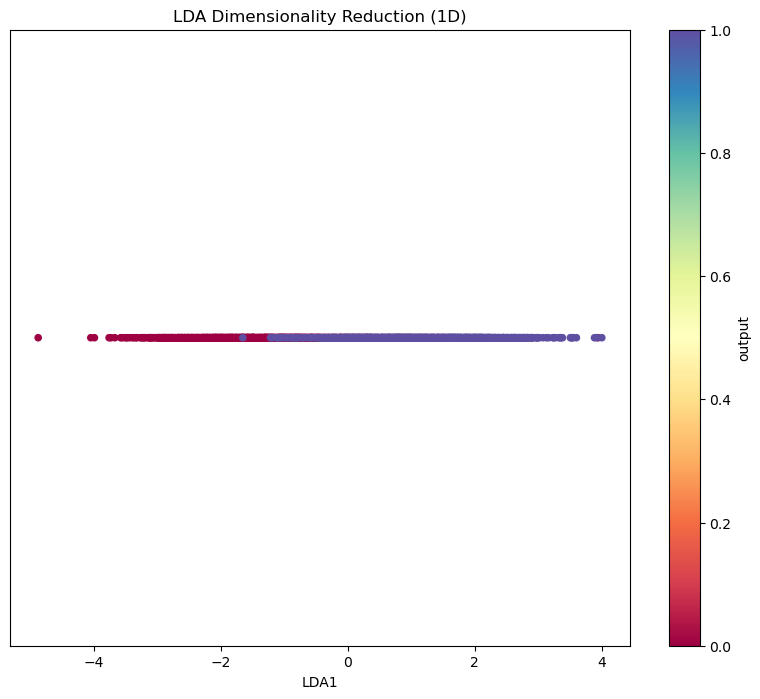

,LDA1,output
0,1.11,0.00
1,-1.52,0.00
2,-1.13,0.00
3,-0.58,0.00
4,-0.45,0.00




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 108 entries, AGE to output
dtypes: float64(108)
memory usage: 1.4 MB


In [23]:
# Display the transformed DataFrame

data_lda = perform_lda(data=data_balanced, target_column="output")
#print(data_lda.shape)

display_(data_lda.head(), "columns")
data.info()

In [24]:
# UMAP (Set number of components to 2 or 3 to see visualization)
def apply_umap_to_dataframe(df, target_column, n_components=50, visualize=False, random_state=42):
    """
    Applies UMAP for dimensionality reduction on a DataFrame and reattaches the target column.

    Parameters:
    - df: pandas.DataFrame
        Input DataFrame containing features and target.
    - target_column: str
        Name of the target column to exclude during transformation.
    - n_components: int
        Number of dimensions to reduce the data to. Default is 50.
    - visualize: bool
        If True, visualize the reduced data in 2D or 3D.
        Requires n_components to be 2 or 3 for meaningful visualization.
    - random_state: int
        Random seed for reproducibility. Default is 42.

    Returns:
    - transformed_df: pandas.DataFrame
        A DataFrame containing the reduced features and the target column.
    """
    # Step 1: Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Step 2: Standardize Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 3: Initialize and Apply UMAP
    umap = UMAP(n_components=n_components, random_state=random_state)
    X_reduced = umap.fit_transform(X_scaled)

    # Step 4: Create a DataFrame for the reduced features
    reduced_columns = [f"Feature_{i+1}" for i in range(n_components)]
    X_reduced_df = pd.DataFrame(X_reduced, columns=reduced_columns, index=df.index)

    # Add back the target column
    transformed_df = pd.concat([X_reduced_df, y], axis=1)

    # Step 5: Visualization (if applicable)
    if visualize and n_components in [2, 3]:
        fig = plt.figure(figsize=(10, 8))
        if n_components == 2:
            plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="Spectral", s=10)
            plt.colorbar(label=target_column)
            plt.title("UMAP Dimensionality Reduction (2D)")
            plt.xlabel("Component 1")
            plt.ylabel("Component 2")
        elif n_components == 3:
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap="Spectral", s=10)
            fig.colorbar(scatter, label=target_column)
            ax.set_title("UMAP Dimensionality Reduction (3D)")
            ax.set_xlabel("Component 1")
            ax.set_ylabel("Component 2")
            ax.set_zlabel("Component 3")
        plt.show()

    return transformed_df

In [25]:
data_umap = transformed_df = apply_umap_to_dataframe(data_balanced, target_column='output', n_components=50, visualize=True, random_state=42)

display_(data_umap.head(), "columns")
data.info()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,output
0,9.72,9.58,2.92,10.39,4.92,8.08,10.65,7.41,5.44,5.47,4.35,7.48,3.72,2.12,4.18,4.62,2.52,7.25,6.39,7.47,4.01,3.79,4.51,4.04,5.61,3.62,1.99,6.12,9.62,6.95,7.27,2.34,8.05,8.23,4.07,7.09,7.62,1.12,8.84,3.75,6.19,6.90,4.37,1.36,4.87,6.32,7.43,5.09,5.77,6.60,0.00
1,10.96,8.90,0.98,14.02,6.10,9.10,10.68,7.31,5.71,6.41,3.81,5.70,3.75,1.73,4.36,4.37,1.44,8.03,5.86,8.66,3.23,3.26,5.06,6.04,6.22,3.24,1.77,6.58,9.42,8.31,8.63,1.54,9.55,7.40,2.98,8.12,7.70,0.47,10.15,3.31,6.34,7.53,4.39,-0.64,3.22,7.00,6.86,4.43,6.31,7.46,0.00
2,10.87,8.67,0.84,13.71,6.66,8.80,10.16,7.96,6.26,5.61,3.29,6.36,4.22,1.88,4.28,4.51,1.98,7.55,5.17,8.70,3.61,3.55,4.91,5.75,6.02,3.72,1.47,6.41,9.77,8.53,8.26,1.69,9.18,7.70,3.28,7.91,7.42,0.69,9.94,3.47,6.22,7.27,4.39,0.24,3.34,6.49,6.88,4.58,6.37,7.21,0.00
3,11.41,9.15,0.64,14.36,6.50,8.89,10.14,7.47,5.54,6.37,3.64,6.40,4.00,1.82,4.62,4.56,1.69,7.76,5.34,8.97,3.13,3.12,5.07,5.85,6.11,3.08,1.38,6.64,9.26,8.82,8.55,1.17,9.59,7.36,3.40,8.01,7.51,0.39,10.22,3.80,6.41,7.33,3.94,-0.28,3.00,6.81,6.60,4.42,6.16,7.01,0.00
4,11.26,9.13,1.17,13.84,6.17,8.57,10.32,7.40,5.93,5.92,3.89,6.34,3.93,1.89,4.63,4.64,1.88,7.73,5.46,8.62,3.05,3.27,5.11,5.71,6.24,3.25,1.46,6.68,9.12,8.56,8.35,1.08,9.39,7.43,3.37,7.97,7.55,0.54,10.03,3.84,6.40,7.23,4.25,-0.23,3.04,6.76,6.55,4.43,6.12,6.96,0.00




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 108 entries, AGE to output
dtypes: float64(108)
memory usage: 1.4 MB


## VISUALIZATION WITH T-SNE

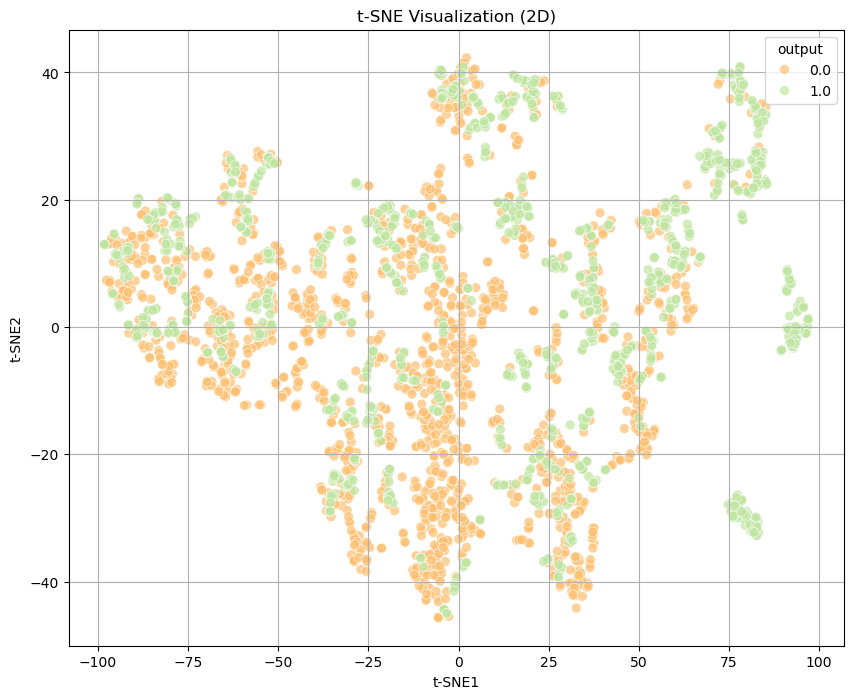

In [26]:
def visualize_tsne(data, target_column, perplexity=30, n_components=2, learning_rate=200, random_state=42):
    """
    Visualize data using t-SNE.

    Args:
        data: Pandas DataFrame containing the dataset.
        target_column: Name of the target column (for coloring the points).
        perplexity: Perplexity for t-SNE (default: 30).
        n_components: Number of dimensions for t-SNE (2 or 3; default: 2).
        learning_rate: Learning rate for t-SNE (default: 200).
        random_state: Random state for reproducibility (default: 42).

    Returns:
        None (displays the t-SNE plot).
    """
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Apply t-SNE
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, random_state=random_state)
    tsne_results = tsne.fit_transform(X)

    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=[f"t-SNE{i+1}" for i in range(n_components)])
    tsne_df[target_column] = y.values

    # Plotting
    plt.figure(figsize=(10, 8))
    if n_components == 2:
        sns.scatterplot(
            x="t-SNE1", y="t-SNE2", hue=target_column, data=tsne_df, palette="Spectral", s=50, alpha=0.7
        )
        plt.title("t-SNE Visualization (2D)")
        plt.xlabel("t-SNE1")
        plt.ylabel("t-SNE2")
    elif n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            tsne_df["t-SNE1"], tsne_df["t-SNE2"], tsne_df["t-SNE3"], c=tsne_df[target_column], cmap="Spectral", s=50, alpha=0.7
        )
        ax.set_title("t-SNE Visualization (3D)")
        ax.set_xlabel("t-SNE1")
        ax.set_ylabel("t-SNE2")
        ax.set_zlabel("t-SNE3")
        plt.colorbar(scatter, ax=ax, pad=0.2, label=target_column)
    else:
        raise ValueError("t-SNE visualization only supports 2D or 3D.")
    
    plt.grid(True)
    plt.show()

# Visualize with t-SNE (2D)
visualize_tsne(data_balanced, target_column="output", perplexity=30, n_components=2)

# MODEL TRAINING

### DATA VERSIONS
 - data (original unbalanced data)
 - data_balanced (original dataset balanced with SMOTE)
 - data_pca (PCA reduced dataset - 79 features, 90% variance)
 - data_fld (FLD reduced dataset)
 - data_umap (UMAP reduced dataset)
#### we will train 29 different model on each of the dataset using 29 different algorithm and in each case, we will choose the best performing model for fine-tuning and optimization

In [27]:
# Function for using lazypredict to compare potential performance of models
def train_and_evaluate_lazy_classifier(data, target_column, test_size=0.2, random_state=42, normalize_method='min_max'):
    """
    Trains and evaluates multiple classification models using LazyClassifier.
    
    Parameters:
    - data (pd.DataFrame): The input dataset.
    - target_column (str): The name of the target column.
    - test_size (float): The proportion of the dataset to include in the test split.
    - random_state (int): Random seed for reproducibility.
    - normalize_method (str): Method to normalize data ('min_max', 'z_score', etc.).
    
    Returns:
    - models (pd.DataFrame): A DataFrame of models and their performance metrics.
    - predictions (dict): Predictions from each model.
    """
    # Normalize the dataset
    data = normalize_dataset(data, method=normalize_method)
    
    # Separate features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    
    # Fit LazyClassifier
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    
    return models, predictions

In [28]:
# Function for calculating sensitivity and specificity
def calculate_sensitivity_specificity(conf_matrix):
    """
    Calculate sensitivity and specificity from a confusion matrix.
    
    Args:
        conf_matrix: Confusion matrix (2x2).
        
    Returns:
        sensitivity: True Positive Rate.
        specificity: True Negative Rate.
    """
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    return sensitivity, specificity

## TRAINING 27 MODELS WITH UNBALANCED ORIGINAL DATA

In [29]:
# Assuming 'data' is your dataset and 'output' is the target column
models, predictions = train_and_evaluate_lazy_classifier(data=data, target_column="output")

# Display the model performance metrics
print(models)

 97%|█████████▋| 28/29 [00:12<00:00,  4.34it/s]

[LightGBM] [Info] Number of positive: 219, number of negative: 1141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 1360, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161029 -> initscore=-1.650589
[LightGBM] [Info] Start training from score -1.650589


100%|██████████| 29/29 [00:13<00:00,  2.21it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.93               0.78     0.78      0.92   
LGBMClassifier                     0.93               0.77     0.77      0.92   
AdaBoostClassifier                 0.90               0.75     0.75      0.90   
DecisionTreeClassifier             0.87               0.75     0.75      0.87   
RandomForestClassifier             0.92               0.75     0.75      0.91   
BaggingClassifier                  0.92               0.75     0.75      0.91   
BernoulliNB                        0.86               0.75     0.75      0.87   
NearestCentroid                    0.82               0.75     0.75      0.84   
PassiveAggressiveClassifier        0.86               0.70     0.70      0.85   
Perceptron                         0.84               0.69     0.69      0.84   
LinearSVC                   

#### OPTIMIZING THE BEST PERFORMING MODEL (XGBOOST)

scale_pos_weight: 5.2673
Fitting 3 folds for each of 128 candidates, totalling 384 fits

Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       286
         1.0       0.85      0.61      0.71        54

    accuracy                           0.92       340
   macro avg       0.89      0.80      0.83       340
weighted avg       0.92      0.92      0.92       340



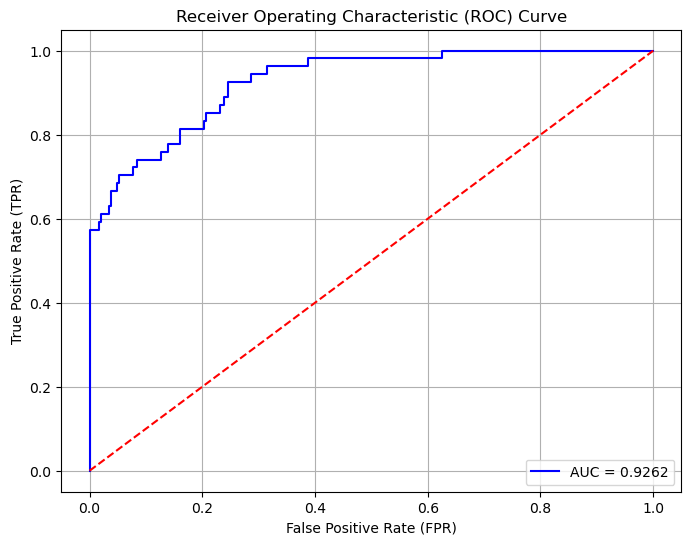

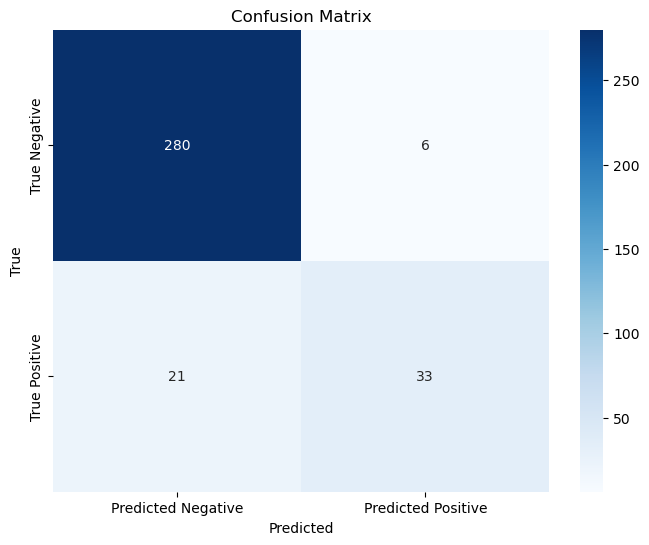


Evaluation Metrics:
Accuracy: 0.9206
Precision: 0.8462
Recall (sensitivity): 0.6111
Specificity: 0.9790
F1_score: 0.7097
Auc: 0.9262

Feature Importance Table:
         Feature  Importance
0            AGE      217.00
1        L_BLOOD      202.00
2      S_AD_ORIT      132.00
3            ROE      128.00
4       TIME_B_S      123.00
..           ...         ...
67  n_p_ecg_p_08        2.00
68         nr_03        1.00
69    zab_leg_04        1.00
70   fibr_ter_02        1.00
71   fibr_ter_03        1.00

[72 rows x 2 columns]


In [30]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a model on test data.
    
    Args:
        model: Trained model.
        X_test: Test features.
        y_test: Test target labels.
    
    Returns:
        metrics: Dictionary containing evaluation metrics.
    """
    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity and Specificity
    sensitivity, specificity = calculate_sensitivity_specificity(conf_matrix)

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity
    f1 = f1_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Metrics dictionary
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc_value,
    }

    # Display metrics
    print("\nEvaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    return metrics


def get_feature_importance_table(model):
    """
    Extract feature importance as a sorted table.
    
    Args:
        model: Trained XGBoost model.
    
    Returns:
        feature_importance_df: DataFrame with feature importance sorted in descending order.
    """
    feature_importance = model.get_booster().get_score(importance_type="weight")
    feature_importance_df = pd.DataFrame(
        sorted(feature_importance.items(), key=lambda x: x[1], reverse=True),
        columns=["Feature", "Importance"]
    )
    print("\nFeature Importance Table:")
    print(feature_importance_df)
    return feature_importance_df

# Main training workflow
if __name__ == "__main__":
    X = data.drop("output", axis=1)
    y = data["output"]

    # Split dataset with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Calculate scale_pos_weight for imbalanced data
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
    print(f"scale_pos_weight: {scale_pos_weight:.4f}")

    # Initialize XGBoost model with scale_pos_weight
    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale_pos_weight)

    # Hyperparameter grid for GridSearchCV
    param_grid = {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [3, 5, 7, 8],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "subsample": [0.8, 1.0]
    }

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Display best parameters
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the best model
    metrics = evaluate_model(best_model, X_test, y_test)

    # Get feature importance as a table
    feature_importance_table = get_feature_importance_table(best_model)

## TRAINING 27 MODELS WITH BALANCED DATA

In [31]:
# Training multiple models
models, predictions = train_and_evaluate_lazy_classifier(data=data_balanced, target_column="output")

# Display the model performance metrics
print(models)

 97%|█████████▋| 28/29 [00:28<00:00,  1.14it/s]

[LightGBM] [Info] Number of positive: 1145, number of negative: 1141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13464
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500875 -> initscore=0.003500
[LightGBM] [Info] Start training from score 0.003500


100%|██████████| 29/29 [00:32<00:00,  1.10s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
RandomForestClassifier             0.97               0.97     0.97      0.97   
LGBMClassifier                     0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
LabelSpreading                     0.97               0.97     0.97      0.97   
LabelPropagation                   0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.96               0.96     0.96      0.96   
BaggingClassifier                  0.95               0.95     0.95      0.95   
DecisionTreeClassifier             0.93               0.93     0.93      0.93   
SVC                                0.92               0.92     0.92      0.92   
NuSVC                       

#### OPTIMIZING THE EXTRATREES CLASSIFIER (EXTRATREESCLASSIFIER)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       286
           1       0.98      0.98      0.98       286

    accuracy                           0.98       572
   macro avg       0.98      0.98      0.98       572
weighted avg       0.98      0.98      0.98       572



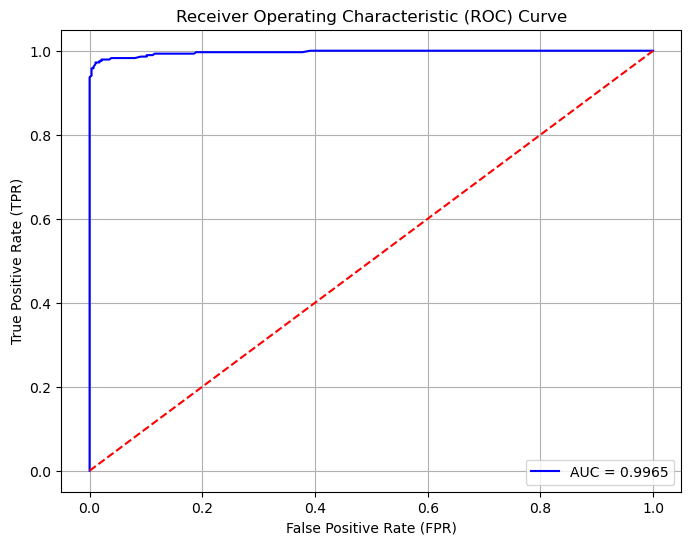

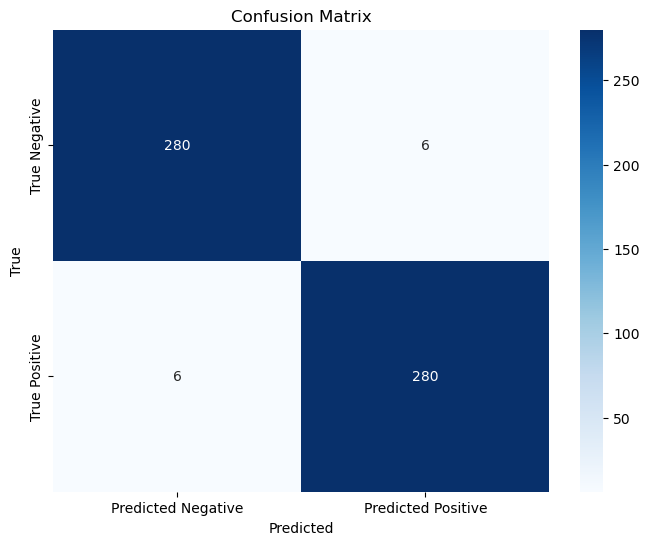


Evaluation Metrics:
Accuracy: 0.9790
Precision: 0.9790
Recall (sensitivity): 0.9790
Specificity: 0.9790
F1_score: 0.9790
Auc: 0.9965

Feature Importance Table:
           Feature  Importance
104        ASP_S_n        0.04
93          NITR_S        0.04
45   ritm_ecg_p_01        0.03
35       K_SH_POST        0.03
86        TIME_B_S        0.03
..             ...         ...
37        SVT_POST        0.00
76     fibr_ter_07        0.00
74     fibr_ter_05        0.00
75     fibr_ter_06        0.00
38         GT_POST        0.00

[107 rows x 2 columns]


In [32]:
def calculate_sensitivity_specificity(conf_matrix):
    """
    Calculate sensitivity and specificity from a confusion matrix.
    
    Args:
        conf_matrix: Confusion matrix (2x2).
        
    Returns:
        sensitivity: True Positive Rate.
        specificity: True Negative Rate.
    """
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    return sensitivity, specificity


def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a model on test data.
    
    Args:
        model: Trained model.
        X_test: Test features.
        y_test: Test target labels.
    
    Returns:
        metrics: Dictionary containing evaluation metrics.
    """
    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity and Specificity
    sensitivity, specificity = calculate_sensitivity_specificity(conf_matrix)

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity
    f1 = f1_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Metrics dictionary
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc_value,
    }

    # Display metrics
    print("\nEvaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    return metrics


def get_feature_importance_table(model, feature_names):
    """
    Extract feature importance as a sorted table.
    
    Args:
        model: Trained ExtraTreesClassifier model.
        feature_names: List of feature names.
    
    Returns:
        feature_importance_df: DataFrame with feature importance sorted in descending order.
    """
    feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame(
        {'Feature': feature_names, 'Importance': feature_importance}
    ).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importance Table:")
    print(feature_importance_df)
    return feature_importance_df

# main training workflow
if __name__ == "__main__":
    X = data_balanced.drop("output", axis = 1)
    y = data_balanced["output"]

    # Convert to binary classification (class 0 vs classes 1 and 2)
    y = (y > 0).astype(int)

    # Split dataset with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Initialize ExtraTreesClassifier
    model = ExtraTreesClassifier(random_state=42, class_weight='balanced')

    # Hyperparameter grid for GridSearchCV
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    }

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Display best parameters
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the best model
    metrics = evaluate_model(best_model, X_test, y_test)

    # Get feature importance as a table
    feature_importance_table = get_feature_importance_table(best_model, X.columns)


## TRAINING 27 MODELS WITH PCA REDUCED DATASET

In [33]:
# Training multiple models
models, predictions = train_and_evaluate_lazy_classifier(data=data_pca, target_column="output")

# Display the model performance metrics
print(models)

 97%|█████████▋| 28/29 [00:23<00:00,  1.24it/s]

[LightGBM] [Info] Number of positive: 1145, number of negative: 1141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19635
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500875 -> initscore=0.003500
[LightGBM] [Info] Start training from score 0.003500


100%|██████████| 29/29 [00:28<00:00,  1.01it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.95               0.95     0.95      0.95   
LabelSpreading                     0.95               0.95     0.95      0.95   
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
LGBMClassifier                     0.92               0.92     0.92      0.92   
XGBClassifier                      0.92               0.92     0.92      0.92   
SVC                                0.91               0.91     0.91      0.91   
RandomForestClassifier             0.90               0.90     0.90      0.90   
NuSVC                              0.90               0.90     0.90      0.90   
KNeighborsClassifier               0.87               0.87     0.87      0.87   
BaggingClassifier                  0.87               0.87     0.87      0.87   
AdaBoostClassifier          

#### OPTIMIZING THE BEST PERFORMING MODEL (LABELPROPAGATION)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90       286
         1.0       0.87      0.94      0.90       286

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.90      0.90      0.90       572



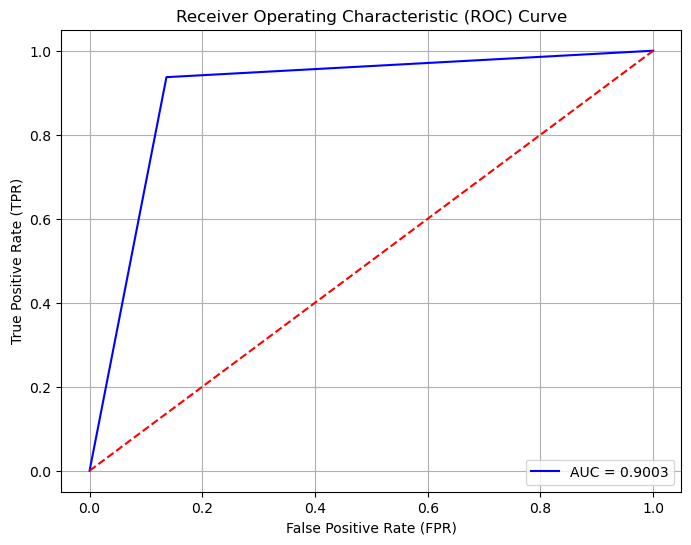

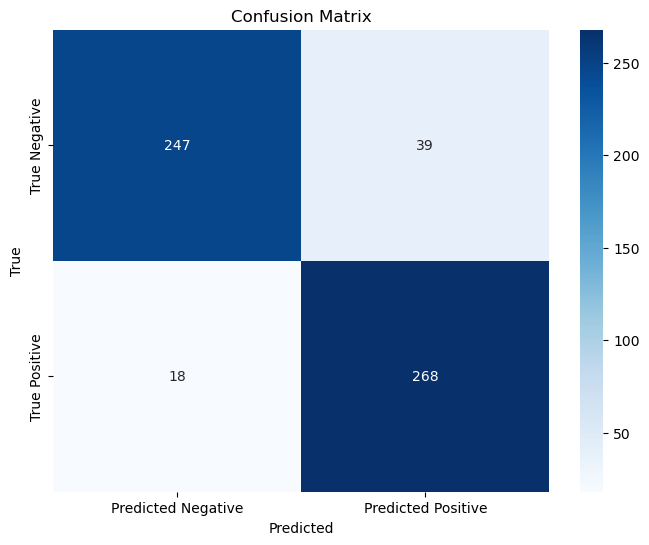


Evaluation Metrics:
Accuracy: 0.9003
Precision: 0.8730
Recall (sensitivity): 0.9371
Specificity: 0.8636
F1_score: 0.9039
Auc: 0.9003


In [34]:
def calculate_sensitivity_specificity(conf_matrix):
    """
    Calculate sensitivity and specificity from a confusion matrix.
    
    Args:
        conf_matrix: Confusion matrix (2x2).
        
    Returns:
        sensitivity: True Positive Rate.
        specificity: True Negative Rate.
    """
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    return sensitivity, specificity


def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a model on test data.
    
    Args:
        model: Trained model.
        X_test: Test features.
        y_test: Test target labels.
    
    Returns:
        metrics: Dictionary containing evaluation metrics.
    """
    # Predict class labels for the test set
    y_pred = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity and Specificity
    sensitivity, specificity = calculate_sensitivity_specificity(conf_matrix)

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity
    f1 = f1_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # ROC Curve and AUC
    # Since LabelPropagation does not directly provide probabilities, we can use the decision function
    # to approximate probabilities, or use the predicted labels for the ROC curve.
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Metrics dictionary
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc_value,
    }

    # Display metrics
    print("\nEvaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    return metrics

# Main training workflow
if __name__ == "__main__":
    X = data_pca.drop("output", axis = 1)
    y = data_pca["output"]

    # Split dataset with stratification for labeled data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Create unlabeled data: randomly mask some labels
    unlabeled_fraction = 0.5  # 50% of the training data will be unlabeled
    mask = np.random.rand(len(y_train)) < unlabeled_fraction
    y_train_masked = y_train.copy()
    y_train_masked[mask] = -1  # -1 denotes unlabeled data for LabelPropagation

    # Initialize LabelPropagation
    model = LabelPropagation(kernel='rbf', gamma=10)

    # Train LabelPropagation model
    model.fit(X_train, y_train_masked)

    # Evaluate the model
    metrics = evaluate_model(model, X_test, y_test)

## TRAINING 27 MODELS WITH FLD REDUCED DATA

In [35]:
# Training multiple models
models, predictions = train_and_evaluate_lazy_classifier(data=data_lda, target_column="output")

# Display the model performance metrics
print(models)

 97%|█████████▋| 28/29 [00:06<00:00,  4.08it/s]

[LightGBM] [Info] Number of positive: 1145, number of negative: 1141
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500875 -> initscore=0.003500
[LightGBM] [Info] Start training from score 0.003500


100%|██████████| 29/29 [00:07<00:00,  4.01it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.86               0.86     0.86      0.86   
LGBMClassifier                     0.86               0.86     0.86      0.86   
NuSVC                              0.86               0.86     0.86      0.86   
PassiveAggressiveClassifier        0.86               0.86     0.86      0.86   
LogisticRegression                 0.86               0.86     0.86      0.86   
LinearSVC                          0.86               0.86     0.86      0.86   
CalibratedClassifierCV             0.86               0.86     0.86      0.86   
LabelPropagation                   0.86               0.86     0.86      0.86   
LabelSpreading                     0.86               0.86     0.86      0.86   
GaussianNB                         0.86               0.86     0.86      0.86   
QuadraticDiscriminantAnalysi

#### OPTIMIZING THE BEST PERFORMING MODEL (XGBOOST)

scale_pos_weight: 1.0000
Fitting 3 folds for each of 128 candidates, totalling 384 fits

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       286
         1.0       0.81      0.96      0.88       286

    accuracy                           0.87       572
   macro avg       0.88      0.87      0.87       572
weighted avg       0.88      0.87      0.87       572



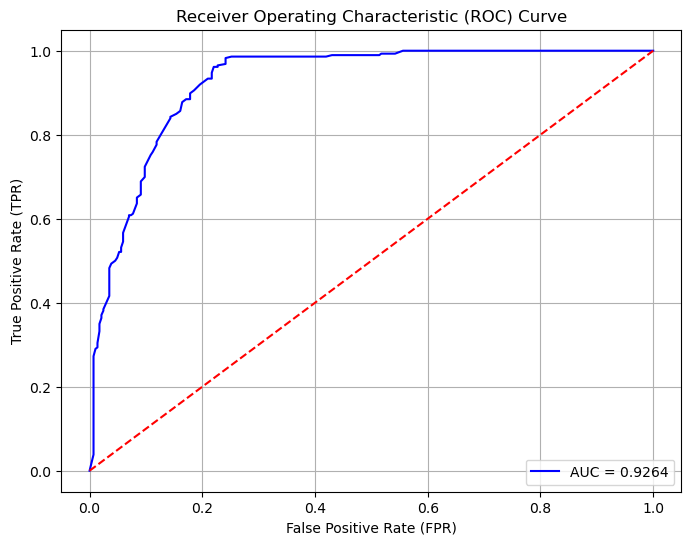

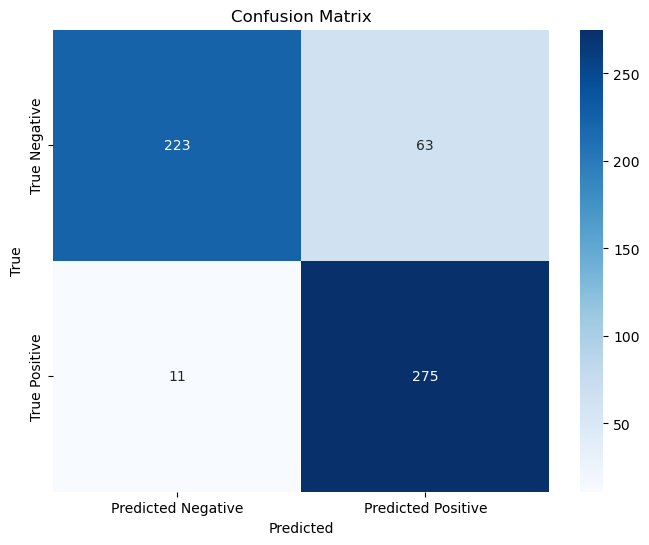


Evaluation Metrics:
Accuracy: 0.8706
Precision: 0.8136
Recall (sensitivity): 0.9615
Specificity: 0.7797
F1_score: 0.8814
Auc: 0.9264

Feature Importance Table:
  Feature  Importance
0    LDA1     1022.00


In [36]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a model on test data.
    
    Args:
        model: Trained model.
        X_test: Test features.
        y_test: Test target labels.
    
    Returns:
        metrics: Dictionary containing evaluation metrics.
    """
    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity and Specificity
    sensitivity, specificity = calculate_sensitivity_specificity(conf_matrix)

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity
    f1 = f1_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Metrics dictionary
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc_value,
    }

    # Display metrics
    print("\nEvaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    return metrics


def get_feature_importance_table(model):
    """
    Extract feature importance as a sorted table.
    
    Args:
        model: Trained XGBoost model.
    
    Returns:
        feature_importance_df: DataFrame with feature importance sorted in descending order.
    """
    feature_importance = model.get_booster().get_score(importance_type="weight")
    feature_importance_df = pd.DataFrame(
        sorted(feature_importance.items(), key=lambda x: x[1], reverse=True),
        columns=["Feature", "Importance"]
    )
    print("\nFeature Importance Table:")
    print(feature_importance_df)
    return feature_importance_df

# Main training workflow
if __name__ == "__main__":
    X = data_lda.drop("output", axis=1)
    y = data_lda["output"]

    # Split dataset with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Calculate scale_pos_weight for imbalanced data
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
    print(f"scale_pos_weight: {scale_pos_weight:.4f}")

    # Initialize XGBoost model with scale_pos_weight
    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale_pos_weight)

    # Hyperparameter grid for GridSearchCV
    param_grid = {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [3, 5, 7, 8],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "subsample": [0.8, 1.0]
    }

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Display best parameters
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the best model
    metrics = evaluate_model(best_model, X_test, y_test)

    # Get feature importance as a table
    feature_importance_table = get_feature_importance_table(best_model)

## TRAINING OF 27 MODEL WITH UMAP DATA

In [37]:
# Training multiple models
models, predictions = train_and_evaluate_lazy_classifier(data=data_umap, target_column="output")

# Display the model performance metrics
print(models)

 97%|█████████▋| 28/29 [00:34<00:01,  1.18s/it]

[LightGBM] [Info] Number of positive: 1145, number of negative: 1141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500875 -> initscore=0.003500
[LightGBM] [Info] Start training from score 0.003500


100%|██████████| 29/29 [00:36<00:00,  1.26s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.90               0.90     0.90      0.90   
LGBMClassifier                     0.89               0.89     0.89      0.89   
XGBClassifier                      0.89               0.89     0.89      0.89   
BaggingClassifier                  0.88               0.88     0.88      0.88   
LabelPropagation                   0.88               0.88     0.88      0.88   
RandomForestClassifier             0.88               0.88     0.88      0.88   
LabelSpreading                     0.88               0.88     0.88      0.88   
KNeighborsClassifier               0.87               0.87     0.87      0.87   
ExtraTreeClassifier                0.86               0.86     0.86      0.86   
DecisionTreeClassifier             0.84               0.84     0.84      0.84   
AdaBoostClassifier          

#### OPTIMIZING THE BEST PERFORMING MODEL

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       286
           1       0.85      0.93      0.89       286

    accuracy                           0.88       572
   macro avg       0.88      0.88      0.88       572
weighted avg       0.88      0.88      0.88       572



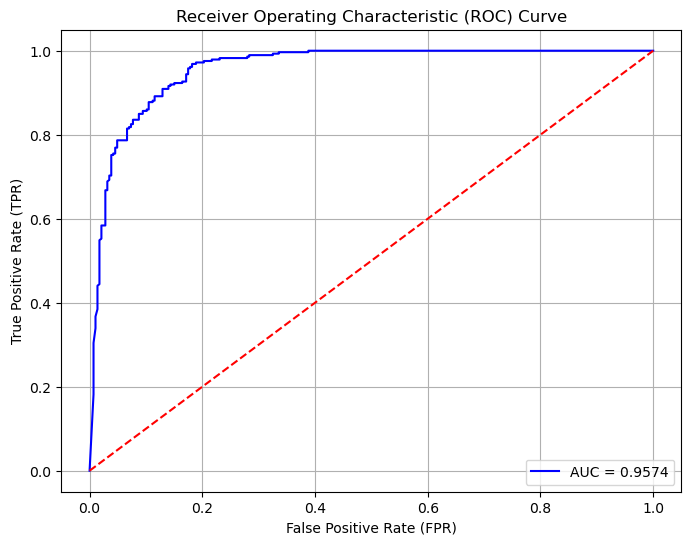

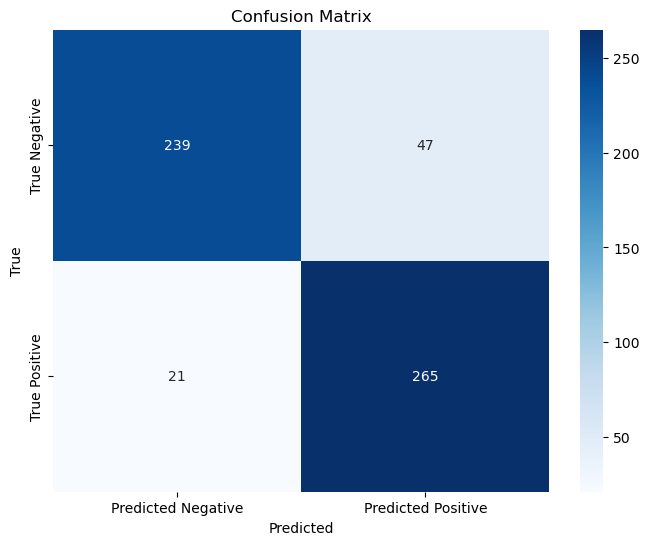


Evaluation Metrics:
Accuracy: 0.8811
Precision: 0.8494
Recall (sensitivity): 0.9266
Specificity: 0.8357
F1_score: 0.8863
Auc: 0.9574

Feature Importance Table:
       Feature  Importance
44  Feature_45        0.04
28  Feature_29        0.03
35  Feature_36        0.03
47  Feature_48        0.03
32  Feature_33        0.03
17  Feature_18        0.03
40  Feature_41        0.03
21  Feature_22        0.03
33  Feature_34        0.03
46  Feature_47        0.03
22  Feature_23        0.03
0    Feature_1        0.02
34  Feature_35        0.02
20  Feature_21        0.02
29  Feature_30        0.02
27  Feature_28        0.02
23  Feature_24        0.02
41  Feature_42        0.02
3    Feature_4        0.02
30  Feature_31        0.02
13  Feature_14        0.02
16  Feature_17        0.02
11  Feature_12        0.02
38  Feature_39        0.02
45  Feature_46        0.02
36  Feature_37        0.02
31  Feature_32        0.02
24  Feature_25        0.02
5    Feature_6        0.02
43  Feature_44        0.02
37

In [38]:
def calculate_sensitivity_specificity(conf_matrix):
    """
    Calculate sensitivity and specificity from a confusion matrix.
    
    Args:
        conf_matrix: Confusion matrix (2x2).
        
    Returns:
        sensitivity: True Positive Rate.
        specificity: True Negative Rate.
    """
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
    return sensitivity, specificity


def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a model on test data.
    
    Args:
        model: Trained model.
        X_test: Test features.
        y_test: Test target labels.
    
    Returns:
        metrics: Dictionary containing evaluation metrics.
    """
    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity and Specificity
    sensitivity, specificity = calculate_sensitivity_specificity(conf_matrix)

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity
    f1 = f1_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Metrics dictionary
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc_value,
    }

    # Display metrics
    print("\nEvaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

    return metrics


def get_feature_importance_table(model, feature_names):
    """
    Extract feature importance as a sorted table.
    
    Args:
        model: Trained ExtraTreesClassifier model.
        feature_names: List of feature names.
    
    Returns:
        feature_importance_df: DataFrame with feature importance sorted in descending order.
    """
    feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame(
        {'Feature': feature_names, 'Importance': feature_importance}
    ).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importance Table:")
    print(feature_importance_df)
    return feature_importance_df
    
# main training workflow
if __name__ == "__main__":
    X = data_umap.drop("output", axis = 1)
    y = data_umap["output"]

    # Convert to binary classification (class 0 vs classes 1 and 2)
    y = (y > 0).astype(int)

    # Split dataset with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Initialize ExtraTreesClassifier
    model = ExtraTreesClassifier(random_state=42, class_weight='balanced')

    # Hyperparameter grid for GridSearchCV
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    }

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Display best parameters
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the best model
    metrics = evaluate_model(best_model, X_test, y_test)

    # Get feature importance as a table
    feature_importance_table = get_feature_importance_table(best_model, X.columns)

COMMENT: We fitted 27 different classifiers each to the original unbalanced dataset, balanced version of the dataset (using SMOTE), PCA reduced version (with 79 features and 90% variablilities retained), LDA reduced dataset and UMAP reduced dataset. In each of the above cases, we optimzed the best performing model. The models trained on the original datasets generally performed better, and on that dataset, ExtratreesClassifiers is the best performing algorithm. We obptimzed the ExtratreesClassifier, testing it on test set and confirmed that there was no overfitting since we were able to achieve a very good performance on test set. For this reason, we choose ExtratreesClassifier on the full dataset as our optimal option.

For possibility of further improvement in performance, we will select 8 of the best performing models trained on the best version of the dataset (balanced original dataset), optimize them, fuse them together and check the performance of the fused model is better than that of the single classifier.

## FUSING THE BEST CLASSIFIERS

In [39]:
X = data_balanced.drop("output", axis=1)
y = data_balanced["output"]


# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize Individual Classifiers
classifiers = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'LabelSpreading': LabelSpreading(kernel='knn', n_neighbors=3),
    'LabelPropagation': LabelPropagation(kernel='knn', n_neighbors=3),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LGBM': LGBMClassifier(n_estimators=100, random_state=42),
    'XGB': XGBClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42)
}

# Step 3: Train all classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

# Step 4: Get Classifier Predictions
predictions = {}
for name, clf in classifiers.items():
    predictions[name] = clf.predict(X_test)

# Step 5: Naive Bayes Fusion
# For Naive Bayes Fusion, we take predicted probabilities and use a Naive Bayes classifier on the outputs.
probabilities = {}
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):  # Ensure the classifier supports predict_proba
        probabilities[name] = clf.predict_proba(X_test)
    else:
        # Use a calibrated version of the classifier if it doesn't support predict_proba
        calibrated_clf = CalibratedClassifierCV(clf, method='sigmoid', cv='prefit')
        calibrated_clf.fit(X_train, y_train)
        probabilities[name] = calibrated_clf.predict_proba(X_test)

# Stack the probabilities into a matrix (each column corresponds to one classifier)
prob_matrix = np.column_stack([probabilities[name] for name in classifiers])

# Train a Naive Bayes on the fused probabilities
nb_fusion = GaussianNB()
nb_fusion.fit(prob_matrix, y_test)
y_pred_nb_fusion = nb_fusion.predict(prob_matrix)


# Step 7: Performance Metrics for Individual Models and Fused Models
def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

print("Performance for Individual Models:")
for name, y_pred in predictions.items():
    print(f"\n{name} Accuracy and Report:")
    print_metrics(y_test, y_pred)

# Step 8: Performance of Fused Models
print("\nPerformance for Naive Bayes Fusion:")
print_metrics(y_test, y_pred_nb_fusion)

[LightGBM] [Info] Number of positive: 1004, number of negative: 996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13161
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502000 -> initscore=0.008000
[LightGBM] [Info] Start training from score 0.008000
Performance for Individual Models:

ExtraTrees Accuracy and Report:
Accuracy: 0.9836829836829837
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       433
         1.0       0.99      0.98      0.98       425

    accuracy                           0.98       858
   macro avg       0.98      0.98      0.98       858
weighted avg       0.98      0.98      0.98       858

### FUSION WITH CONFUSION MATRIX

In [40]:
X = data_balanced.drop("output", axis=1)
y = data_balanced["output"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'LabelSpreading': LabelSpreading(kernel='knn', n_neighbors=3),
    'LabelPropagation': LabelPropagation(kernel='knn', n_neighbors=3),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LGBM': LGBMClassifier(n_estimators=100, random_state=42),
    'XGB': XGBClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42)
}

# Train classifiers and compute confusion matrices
confusion_matrices = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)  # Use training data to compute confusion matrix
    confusion_matrices[name] = confusion_matrix(y_train, y_pred)

# Compute reliability scores from confusion matrices
reliability_scores = {}
for name, cm in confusion_matrices.items():
    # Normalize confusion matrix to get reliability per class
    reliability_scores[name] = cm / cm.sum(axis=1, keepdims=True)

# Perform naive fusion using reliability scores
# Initialize an array for fused predictions
n_classes = len(np.unique(y))
fused_probabilities = np.zeros((X_test.shape[0], n_classes))

for name, clf in classifiers.items():
    # Get predictions as probabilities (use predict_proba or one-hot encode predictions)
    if hasattr(clf, "predict_proba"):
        prob = clf.predict_proba(X_test)
    else:
        # One-hot encode predicted labels
        prob = np.zeros((X_test.shape[0], n_classes))
        preds = clf.predict(X_test)
        prob[np.arange(X_test.shape[0]), preds] = 1

    # Weight probabilities by reliability scores
    fused_probabilities += prob * reliability_scores[name].diagonal()

# Make final predictions based on fused probabilities
fused_predictions = np.argmax(fused_probabilities, axis=1)

# Evaluate performance of the fused model
print("Naive Fusion Using Confusion Matrices")
print("Accuracy:", accuracy_score(y_test, fused_predictions))
print("Classification Report:\n", classification_report(y_test, fused_predictions))


[LightGBM] [Info] Number of positive: 1004, number of negative: 996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13161
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502000 -> initscore=0.008000
[LightGBM] [Info] Start training from score 0.008000
Naive Fusion Using Confusion Matrices
Accuracy: 0.9778554778554779
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       433
         1.0       0.98      0.97      0.98       425

    accuracy                           0.98       858
   macro avg       0.98      0.98      0.98       858
weighted avg       0.98      0.98      0.98       858



#### COMMENT: There is no improvement with the fusion hence we will choose extratreesClassifier implemented on the original dataset as our optimal model